# **Data Visualization Project**
Datasets : ชุดข้อมูลผลประเมินของแต่ละวิชาโดยแยกเป็น 2 ส่วน
*   ส่วนที่ 1 คือ รายละเอียดวิชานั้น ๆ (top_head)
*   ส่วนที่ 2 คือ ผลการประเมินตามหัวข้อ (table_content)


           
           

ตัวอย่างส่วนที่ 1 (top_head)

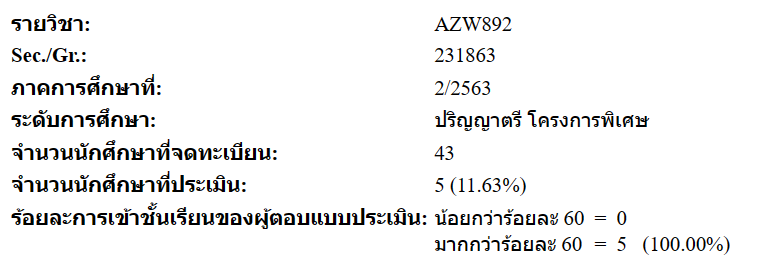

ตัวอย่างส่วนที่ 2 (table_content)

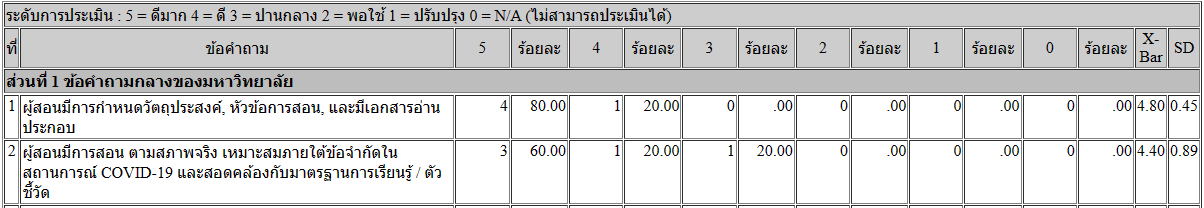

# **การนำข้อมูลเข้า**

1. เรียก libraries ที่จำเป็น

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib as fontmat #ลงฟอนต์ไทย
import matplotlib.pyplot as plt #กราฟ
from matplotlib.cm import ScalarMappable #เฉดสี colorbars
from matplotlib.cm import get_cmap #เฉดสี

1.1 ลงฟอนต์ภาษาไทย


In [ ]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
fontmat.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
fontmat.rc('font', family='Sarabun')

2. นำ Link ทุกเว็บมาเก็บใน List

In [ ]:
main_url = 'https://sgulyano.github.io/eval/'
html_url = ['02226005.html',
            '08846113.html',
            '19689783.html',
            '24363682.html',
            '24674969.html',
            '26742703.html',
            '33472214.html',
            '33561138.html',
            '33565025.html',
            '41557226.html',
            '43951333.html',
            '44868136.html',
            '45435188.html',
            '48033334.html',
            '51435303.html',
            '53231654.html',
            '60189297.html',
            '61116032.html',
            '66887754.html',
            '68346670.html',
            '71728345.html',
            '79550445.html',
            '83255004.html',
            '94026030.html',
            '95860997.html',
            '96905621.html']

  3. ดึงข้อมูลมาจากเว็บ และแปลงเป็น DataFrame
โดยสร้าง function ในแต่ละส่วนไว้



#    Top_head



In [ ]:
content_pack = [] #sum content
head = [] #topic

def top_head(main_url_html_url):
  data = requests.get(main_url_html_url).text
  soup = BeautifulSoup(data,'html.parser')
  content = [] #content
  table_top = soup.find("table", {"border": "0"})
  for row in table_top.find_all('tr'):
      cols = row.find_all('td')
      for ele in cols:
        if ":" in ele.get_text().strip() and len(head) < 6:
          head.append(ele.get_text().strip())
        elif ":" not in ele.get_text().strip() and len(content) < 6:
          content.append(ele.get_text().strip())
  content.append(main_url_html_url)
  content_pack.append(content)
  return head,content_pack

#เรียกใช้ทุกเว็บ
for i in range(len(html_url)):
  top_head(main_url+html_url[i])
head.append('Link Web')

In [ ]:
major_check = pd.DataFrame(columns=head,data=content_pack)
major_check.sample(5)

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web
5,NYE553,231863,1/2564,ปริญญาตรี โครงการพิเศษ,46,15 (32.61%),https://sgulyano.github.io/eval/26742703.html
7,AZW892,231863,2/2564,ปริญญาตรี โครงการพิเศษ,46,33 (71.74%),https://sgulyano.github.io/eval/33561138.html
2,DRI970,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29 (67.44%),https://sgulyano.github.io/eval/19689783.html
9,YRY790,231863,2/2561,ปริญญาตรี โครงการพิเศษ,44,7 (15.91%),https://sgulyano.github.io/eval/41557226.html
12,DRI970,231863,1/2564,ปริญญาตรี โครงการพิเศษ,127,53 (41.73%),https://sgulyano.github.io/eval/45435188.html


# Table_content
(ยกตัวอย่างมาเว็บเดียว ไม่ทำเป็นวนลูปและไม่เลือกเว็บทั้งหมด เพราะข้อมูลมีมาก จึงเลือกเว็บที่สนใจในภายหลัง)

In [ ]:
def table_content(link):
  data = requests.get(link).text
  soup = BeautifulSoup(data,'html.parser')
  tag_table = soup.find("table", {"border": "1"})
  num = 0
  List_Colums = []
  List_Row = []
  List_pack_Row = []
  List_index = []
  for i in range(len(tag_table.find_all("td"))):
      if i >= 17:
          try:
              List_Row.append(f"{float(tag_table.find_all('td')[i].get_text())}")
              # print(List_Row)
              if i == len(tag_table.find_all("td"))-1:
                  # print(List_Row,i)
                  List_pack_Row.append(List_Row)
                  List_Row = []
          except:
              if 'รวม' == tag_table.find_all("td")[i].get_text() or 'รวมทั้งหมด' == tag_table.find_all("td")[i].get_text():
                  List_pack_Row.append(List_Row)
                  List_Row = []
              else:
                  List_pack_Row.append(List_Row[:-1])
                  List_Row = []
              a = f"{tag_table.find_all('td')[i].get_text()}"
              if a == "รวม": #แก้ปัญหาชื่อ คอลัมน์ซ้ำ
                num += 1
                List_Colums.append(f"{a} {num}")
              else:
                List_Colums.append(a)
      else:
          List_index.append((tag_table.find_all('td')[i].get_text()))
  List_pack_Row = List_pack_Row[1:]
  List_index = List_index[3:]
  # print(List_index)
  # print(List_pack_Row)
  # print(List_Colums)
  df = pd.DataFrame()
  for i in range(len(List_Colums)):
      df[List_Colums[i]] = List_pack_Row[i]
  df = df.set_index([List_index])
  df = df.transpose()
  return df

In [ ]:
table_test = table_content("https://sgulyano.github.io/eval/19689783.html")
table_test

,5,ร้อยละ,4,ร้อยละ,3,ร้อยละ,2,ร้อยละ,1,ร้อยละ,0,ร้อยละ,X-Bar,SD
สอนอย่างเป็นระบบ,16.0,57.14,9.0,32.14,2.0,7.14,1.0,3.57,0.0,0.0,0.0,0.0,4.43,0.79
สอนให้คิด วิเคราะห์ วิจารณ์,14.0,50.0,8.0,28.57,6.0,21.43,0.0,0.0,0.0,0.0,0.0,0.0,4.29,0.81
กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม,12.0,42.86,8.0,28.57,6.0,21.43,1.0,3.57,0.0,0.0,1.0,3.57,4.15,0.91
เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบการณ์ ทั้งภายในและภายนอกห้องเรียน,16.0,57.14,9.0,32.14,3.0,10.71,0.0,0.0,0.0,0.0,0.0,0.0,4.46,0.69
มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท้อนความสามารถของผู้เรียนนอกเหนือจากการตอบข้อสอบ,13.0,46.43,13.0,46.43,1.0,3.57,1.0,3.57,0.0,0.0,0.0,0.0,4.36,0.73
ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง,14.0,50.0,7.0,25.0,6.0,21.43,1.0,3.57,0.0,0.0,0.0,0.0,4.21,0.92
ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี,13.0,46.43,11.0,39.29,2.0,7.14,2.0,7.14,0.0,0.0,0.0,0.0,4.25,0.89
แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้,16.0,57.14,8.0,28.57,4.0,14.29,0.0,0.0,0.0,0.0,0.0,0.0,4.43,0.74
รวม 1,114.0,50.89,73.0,32.59,30.0,13.39,6.0,2.68,0.0,0.0,1.0,0.45,4.32,0.81
ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้าโครงการสอนรายวิชาอย่างชัดเจน,20.0,71.43,6.0,21.43,1.0,3.57,1.0,3.57,0.0,0.0,0.0,0.0,4.61,0.74


# **Data Preparation Top_head**


**TOP_HEAD**

1.ดูภาพรวม DataFrame top_head

In [ ]:
major_check = major_check.sort_values('รายวิชา:')
major_check

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web
22,AZW892,231863,2/2563,ปริญญาตรี โครงการพิเศษ,43,5 (11.63%),https://sgulyano.github.io/eval/83255004.html
7,AZW892,231863,2/2564,ปริญญาตรี โครงการพิเศษ,46,33 (71.74%),https://sgulyano.github.io/eval/33561138.html
18,DHT256,270981,2/2562,ปริญญาโท โครงการพิเศษ,12,6 (50.00%),https://sgulyano.github.io/eval/66887754.html
12,DRI970,231863,1/2564,ปริญญาตรี โครงการพิเศษ,127,53 (41.73%),https://sgulyano.github.io/eval/45435188.html
2,DRI970,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29 (67.44%),https://sgulyano.github.io/eval/19689783.html
24,DRI970,728025,1/2563,ปริญญาตรี โครงการพิเศษ,47,25 (53.19%),https://sgulyano.github.io/eval/95860997.html
21,FGL497,231863,2/2564,ปริญญาตรี โครงการพิเศษ,66,41 (62.12%),https://sgulyano.github.io/eval/79550445.html
15,FGL497,696574,2/2563,ปริญญาตรี โครงการพิเศษ,41,4 (9.76%),https://sgulyano.github.io/eval/53231654.html
11,FGL497,231863,2/2563,ปริญญาตรี โครงการพิเศษ,44,6 (13.64%),https://sgulyano.github.io/eval/44868136.html
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html


2.ตรวจสอบความผิดพลาดของข้อมูล (Cleaning Data)


*   เช็คในแต่ละ columns ว่ามี missing values หรือไม่
*   เช็คชนิดของข้อมูล



2.1 เช็ค missing values

In [ ]:
missing_count = major_check.isna().sum()
missing_count.to_frame()

,0
รายวิชา:,0
Sec./Gr.:,0
ภาคการศึกษาที่:,0
ระดับการศึกษา:,0
จำนวนนักศึกษาที่จดทะเบียน:,0
จำนวนนักศึกษาที่ประเมิน:,0
Link Web,0


*ไม่พบ* missing values

2.2 เช็คชนิดข้อมูล

In [ ]:
major_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 22 to 9
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   รายวิชา:                    26 non-null     object
 1   Sec./Gr.:                   26 non-null     object
 2   ภาคการศึกษาที่:             26 non-null     object
 3   ระดับการศึกษา:              26 non-null     object
 4   จำนวนนักศึกษาที่จดทะเบียน:  26 non-null     object
 5   จำนวนนักศึกษาที่ประเมิน:    26 non-null     object
 6   Link Web                    26 non-null     object
dtypes: object(7)
memory usage: 1.6+ KB


***แก้ไข columns***


*   จำนวนนักศึกษาที่จดทะเบียน: แปลงชนิดข้อมูลเป็น int64 (อาจจำเป็นสำหรับการใช้ในอนาคต)


In [ ]:
print("อันเก่า")
print(major_check['จำนวนนักศึกษาที่จดทะเบียน:'].dtype)
print(" ")
print("*"*70)
print(" ")
print("อันใหม่")

major_check['จำนวนนักศึกษาที่จดทะเบียน:'] = major_check['จำนวนนักศึกษาที่จดทะเบียน:'].astype('int64')
print(major_check['จำนวนนักศึกษาที่จดทะเบียน:'].dtype)

อันเก่า
object
 
**********************************************************************
 
อันใหม่
int64


*   จำนวนนักศึกษาที่ประเมิน:	เลือกเฉพาะเปอร์เซ็นต์ float64 2 ทศนิยม (อาจจำเป็นสำหรับการใช้ในอนาคต)

In [ ]:
print("อันเก่า")
print(major_check['จำนวนนักศึกษาที่ประเมิน:'].head(5))
print(" ")
print("*"*70)
print(" ")
print("อันใหม่ เอาแต่เปอร์เซ็น")

keep_percen = []
for i in list(major_check['จำนวนนักศึกษาที่ประเมิน:']):
  keep = float(i.split()[1].replace('(','').replace(')','').replace('%',''))
  keep_percen.append(keep)
major_check['จำนวนนักศึกษาที่ประเมิน_%'] = keep_percen
major_check['จำนวนนักศึกษาที่ประเมิน_%'].head(5)

อันเก่า
22     5 (11.63%)
7     33 (71.74%)
18     6 (50.00%)
12    53 (41.73%)
2     29 (67.44%)
Name: จำนวนนักศึกษาที่ประเมิน:, dtype: object
 
**********************************************************************
 
อันใหม่ เอาแต่เปอร์เซ็น


22    11.63
7     71.74
18    50.00
12    41.73
2     67.44
Name: จำนวนนักศึกษาที่ประเมิน_%, dtype: float64

*   ภาคการศึกษาที่:	เลือกเฉพาะปี (อาจจำเป็นสำหรับการใช้ในอนาคต)

In [ ]:
print("อันเก่า")
print(major_check['ภาคการศึกษาที่:'].head(5))
print(" ")
print("*"*70)
print(" ")
print("อันใหม่")

keep_year = []
for i in list(major_check['ภาคการศึกษาที่:']):
  keep_year.append(i[-4:])
major_check['ปีการศึกษาที่'] = keep_year
major_check['ปีการศึกษาที่'].head(5)

อันเก่า
22    2/2563
7     2/2564
18    2/2562
12    1/2564
2     1/2563
Name: ภาคการศึกษาที่:, dtype: object
 
**********************************************************************
 
อันใหม่


22    2563
7     2564
18    2562
12    2564
2     2563
Name: ปีการศึกษาที่, dtype: object

# **เริ่มตั้งคำถาม EDA ส่วนที่ 1 (top_head)**

**ดูภาพรวมของแต่ละวิชา**


* ภาพรวมตาราง

In [ ]:
major_check.sample(5)

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web,จำนวนนักศึกษาที่ประเมิน_%,ปีการศึกษาที่
18,DHT256,270981,2/2562,ปริญญาโท โครงการพิเศษ,12,6 (50.00%),https://sgulyano.github.io/eval/66887754.html,50.00,2562
2,DRI970,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29 (67.44%),https://sgulyano.github.io/eval/19689783.html,67.44,2563
22,AZW892,231863,2/2563,ปริญญาตรี โครงการพิเศษ,43,5 (11.63%),https://sgulyano.github.io/eval/83255004.html,11.63,2563
16,XCM602,231863,1/2564,ปริญญาตรี โครงการพิเศษ,14,2 (14.29%),https://sgulyano.github.io/eval/60189297.html,14.29,2564
11,FGL497,231863,2/2563,ปริญญาตรี โครงการพิเศษ,44,6 (13.64%),https://sgulyano.github.io/eval/44868136.html,13.64,2563


* ภาพรวมกราฟ Dashboard

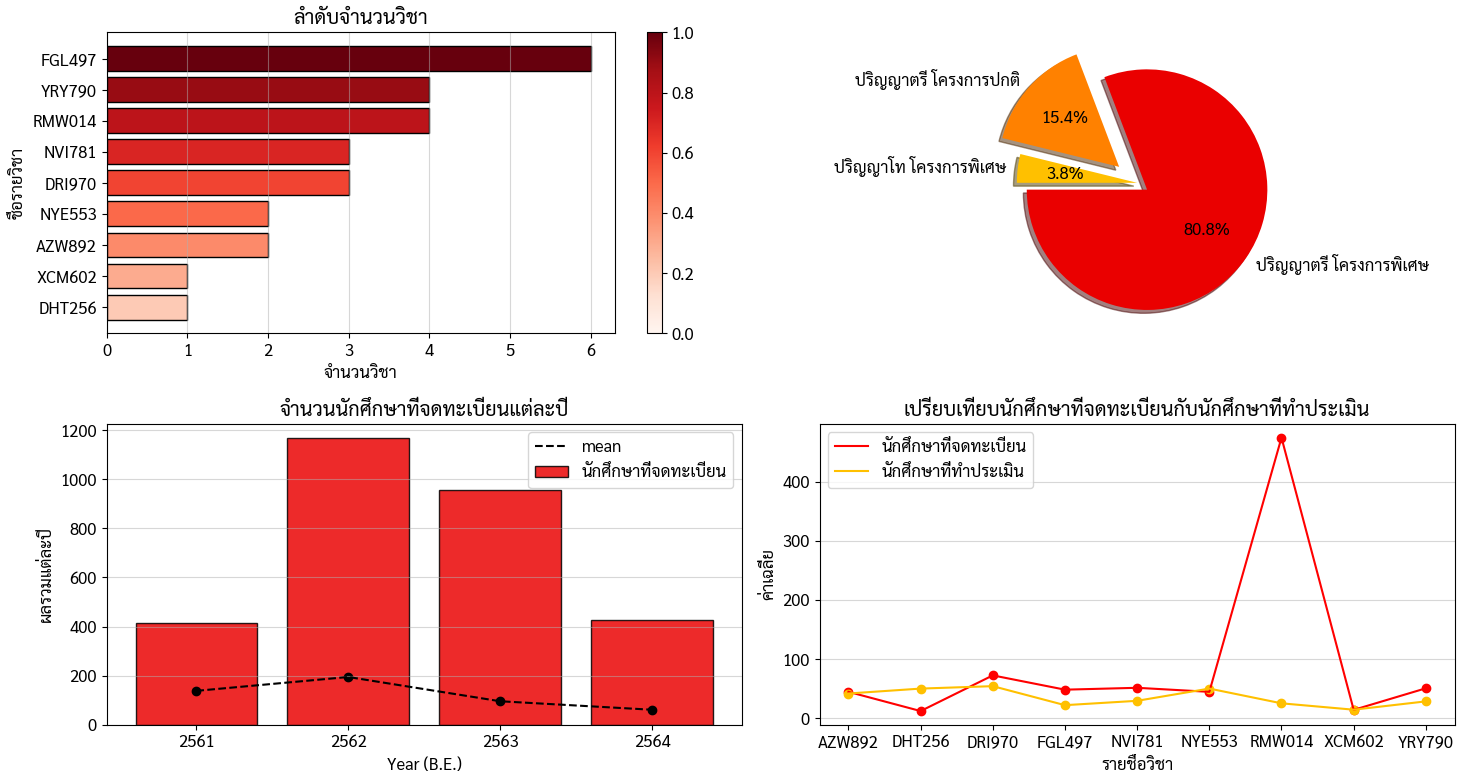

In [ ]:
f,axe = plt.subplots(2,2,figsize=(15,8))
#กราฟซ้ายบน
cmap = plt.get_cmap('Reds')
axe[0,0].barh(major_check['รายวิชา:'].value_counts(ascending=True).index,
              major_check['รายวิชา:'].value_counts(ascending=True),
              edgecolor='black',
              color=cmap(np.linspace(0.2, 1, len(major_check['รายวิชา:'].value_counts().index))))
plt.colorbar(ScalarMappable(cmap='Reds'), ax=axe[0, 0]) #colorbar
axe[0,0].set_title('ลำดับจำนวนวิชา')
axe[0,0].set_xlabel('จำนวนวิชา')
axe[0,0].set_ylabel('ชื่อรายวิชา')
axe[0,0].grid(axis='x',alpha=0.5)

#กราฟขวาบน
axe[0,1].pie(major_check['ระดับการศึกษา:'].value_counts(),
             labels=major_check['ระดับการศึกษา:'].value_counts().index,
             autopct='%1.1f%%',
             startangle=180,
             shadow = True,
             explode=[0.1,0.2,0],
             colors=['#EA0000', '#FF8100', '#FFC000'])

#กราฟซ้ายล่าง
axe[1,0].plot(major_check.groupby('ปีการศึกษาที่').mean(numeric_only=True).round(2).index,
              major_check.groupby('ปีการศึกษาที่').mean(numeric_only=True).round(2)['จำนวนนักศึกษาที่จดทะเบียน:'],
              label='mean',
              color='black',
              linestyle='--')
axe[1,0].bar(major_check.groupby('ปีการศึกษาที่').sum(numeric_only=True).round(2).index,
              major_check.groupby('ปีการศึกษาที่').sum(numeric_only=True).round(2)['จำนวนนักศึกษาที่จดทะเบียน:'],
              label='นักศึกษาที่จดทะเบียน',
              color='#ea0404',
              edgecolor='black',
              alpha=0.85)
axe[1,0].scatter(major_check.groupby('ปีการศึกษาที่').mean(numeric_only=True).round(2).index,
              major_check.groupby('ปีการศึกษาที่').mean(numeric_only=True).round(2)['จำนวนนักศึกษาที่จดทะเบียน:'],
              color='black')
axe[1,0].set_title('จำนวนนักศึกษาที่จดทะเบียนแต่ละปี')
axe[1,0].set_xlabel('Year (B.E.)')
axe[1,0].set_ylabel('ผลรวมแต่ละปี')
axe[1,0].legend()
axe[1,0].grid(axis='y', alpha=0.5)

#กราฟขวาล่าง
axe[1,1].plot(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
              major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่จดทะเบียน:'],
              color='red',
              label='นักศึกษาที่จดทะเบียน')
axe[1,1].scatter(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
                 major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่จดทะเบียน:'],
                 color='red')
axe[1,1].plot(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
              major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่ประเมิน_%'],
              color='#FFC000',
              label='นักศึกษาที่ทำประเมิน')
axe[1,1].scatter(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
                 major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่ประเมิน_%'],
                 color='#FFC000')
axe[1,1].set_title('เปรียบเทียบนักศึกษาที่จดทะเบียนกับนักศึกษาที่ทำประเมิน')
axe[1,1].set_xlabel('รายชื่อวิชา')
axe[1,1].set_ylabel('ค่าเฉลี่ย')
axe[1,1].legend()
axe[1,1].grid(axis='y', alpha=0.5)

f.tight_layout()
plt.show()
# """numeric_only=True ลบคำเตือน """
# for i in range(2):
#     for j in range(2):
#         axe[i, j].get_figure().savefig(f'subplot_{i+1}_{j+1}.png', transparent=True)
# f.savefig('combined_plot.png', transparent=True, bbox_inches='tight')

* กราฟด้านซ้ายบน แสดงให้เห็นว่า รายวิชาไหนเปิดสอนเยอะที่สุด พบว่า FGL497 เยอะสุด
* กราฟด้านขวาบน แสดงให้เห็นว่า Datasets รายวิชาต่างๆ มีระดับการศึกษาอะไรบ้าง พบว่า เป็นปริญญาตรี โครงการพิเศษเยอะสุด
* กราฟด้านซ้ายล่าง แสดงให้เห็นว่า ในแต่ละปีมีจำนวนคนลงทะเบียนเรียนมากน้อยเพียงใด พบว่า ปี 2562 เยอะสุด
* กราฟด้านขวาล่าง แสดงให้เห็นว่า เปรียบเทียบกันระหว่าง นักศึกษาที่ลงเรียน กับ ทำแบบประเมิน พบว่า รายวิชา RWM014 นั้นคนลงเรียนเยอะแต่ทำประเมินน้อย

# **คำถามที่ 1 : ทำไมวิชา FGL497 มีจำนวนเยอะกว่าวิชาอื่นๆ**

**FGL497
สงสัยว่าทำไม FGL497 เปิดสอนจำนวนมากกว่าวิชาอื่นๆ ทั้งๆที่ คนลงทะเบียนก็ไม่ได้เยอะมากถ้าเทียบกับวิชาอื่นๆ**



*   กราฟข้อสงสัย FGL497



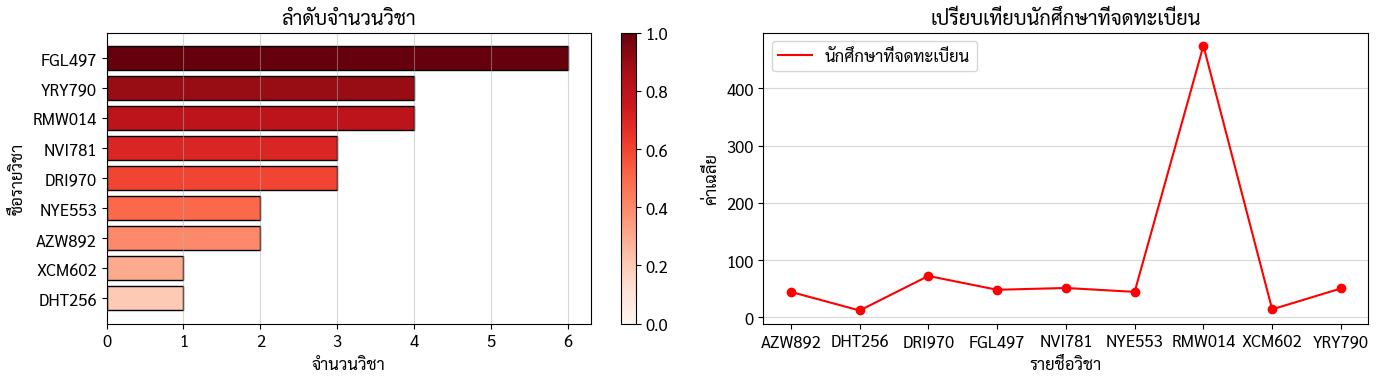

In [ ]:
ff,(left1,right1) = plt.subplots(1,2,figsize=(14,4))

#กราฟซ้ายบน
left1.barh(major_check['รายวิชา:'].value_counts(ascending=True).index,
              major_check['รายวิชา:'].value_counts(ascending=True),edgecolor='black',
              color=cmap(np.linspace(0.2, 1, len(major_check['รายวิชา:'].value_counts().index))))
plt.colorbar(ScalarMappable(cmap='Reds'), ax=left1) #colorbar
left1.set_title('ลำดับจำนวนวิชา')
left1.set_xlabel('จำนวนวิชา')
left1.set_ylabel('ชื่อรายวิชา')
left1.grid(axis='x',alpha=0.5)

#กราฟขวาล่าง
right1.plot(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
              major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่จดทะเบียน:'],
              color='red',label='นักศึกษาที่จดทะเบียน')
right1.scatter(major_check.groupby('รายวิชา:').mean(numeric_only=True).index,
                 major_check.groupby('รายวิชา:').mean(numeric_only=True)['จำนวนนักศึกษาที่จดทะเบียน:'],
                 color='red')
right1.set_title('เปรียบเทียบนักศึกษาที่จดทะเบียน')
right1.set_xlabel('รายชื่อวิชา')
right1.set_ylabel('ค่าเฉลี่ย')
right1.legend()
right1.grid(axis='y', alpha=0.5)

ff.tight_layout()
plt.show()

# ff.savefig('b2.png', transparent=True, bbox_inches='tight')

แสดงให้เห็นว่ากราฟทางด้านซ้าย วิชา FGL497 เปิดสอนมากที่สุดแต่ว่ากราฟทางด้านขวาแสดงให้เห็นถึงค่าเฉลี่ยแต่ละวิชา ซึ่งเป็นค่าเฉลี่ยของจำนวนนักศึกษา
ที่จดทะเบียนเรียน ซึ่งวิชา FGL497 ก็มีคนลงเรียนไม่ได้สูงมากนักถ้าเทียบกับวิชาอื่นๆ โดยเฉพาะหลักความเป็นจริง วิชา RMW014 มีจำนวนคนลงทะเบียนเยอะแสดงว่าต้องเปิดสอนมากที่สุดแต่กลับเป็น วิชา FGL497

หาข้อมูลเชิงลึกของวิชา FGL497

* ตารางวิชา FGL497

In [ ]:
# ทำ Dashborad โชว์ข้อมูล
FGL497 = major_check[major_check['รายวิชา:'].str.contains('FGL')].sort_values('ภาคการศึกษาที่:')
FGL497

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web,จำนวนนักศึกษาที่ประเมิน_%,ปีการศึกษาที่
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,13.95,2562
3,FGL497,231863,2/2562,ปริญญาตรี โครงการพิเศษ,50,5 (10.00%),https://sgulyano.github.io/eval/24363682.html,10.00,2562
15,FGL497,696574,2/2563,ปริญญาตรี โครงการพิเศษ,41,4 (9.76%),https://sgulyano.github.io/eval/53231654.html,9.76,2563
11,FGL497,231863,2/2563,ปริญญาตรี โครงการพิเศษ,44,6 (13.64%),https://sgulyano.github.io/eval/44868136.html,13.64,2563
1,FGL497,728025,2/2563,ปริญญาตรี โครงการพิเศษ,45,10 (22.22%),https://sgulyano.github.io/eval/08846113.html,22.22,2563
21,FGL497,231863,2/2564,ปริญญาตรี โครงการพิเศษ,66,41 (62.12%),https://sgulyano.github.io/eval/79550445.html,62.12,2564


* ภาพรวมวิชา FGL497



1.   ในส่วน column section



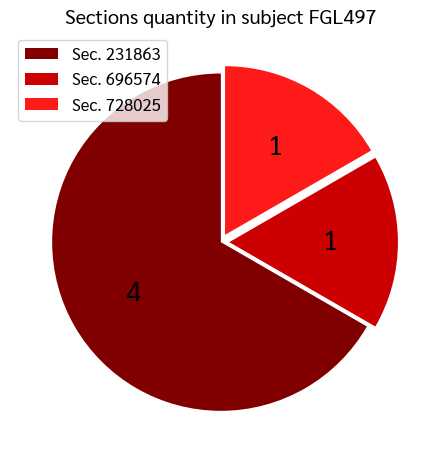

In [ ]:

# สร้างข้อมูลตัวอย่าง
section_counts = FGL497['Sec./Gr.:'].value_counts()
section_labels = ['Sec. ' + i for i in list(section_counts.index)]

# แสดง Pie Chart
plt.pie(section_counts,autopct=lambda p: '{:.0f}'.format(p * sum(section_counts) / 100),
        startangle=90, colors=['#800000', '#cc0000', '#ff1a1a'], textprops={'fontsize': 20},
        explode=[0,0.05,0.05])

plt.title('Sections quantity in subject FGL497')
plt.legend(loc='upper left',labels=section_labels)
plt.savefig('output_pie.png', transparent=True)
plt.tight_layout()
plt.show()

2. ในส่วน columns ระดับการศึกษา

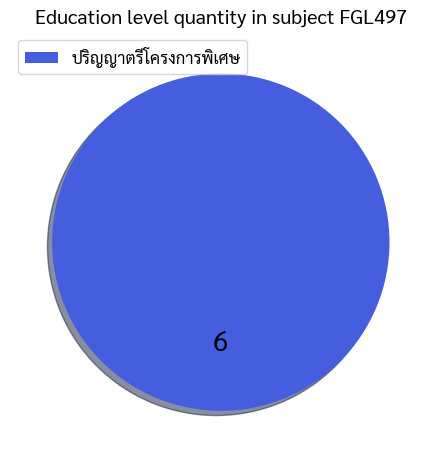

In [ ]:
plt.pie(FGL497['ระดับการศึกษา:'].value_counts(),
             autopct=lambda p: '{:.0f}'.format(p * sum(FGL497['ระดับการศึกษา:'].value_counts()) / 100),
            #  labels=['ปริญญาตรีโครงการพิเศษ'],
             startangle=90,shadow = True,colors=['#455ede'],
             textprops={'fontsize': 20})
plt.title('Education level quantity in subject FGL497')
plt.legend(loc='upper left',labels=['ปริญญาตรีโครงการพิเศษ'])
plt.savefig('output2.png', transparent=True)
plt.tight_layout()
plt.show()


3. ในส่วน columns ภาคการศึกษา

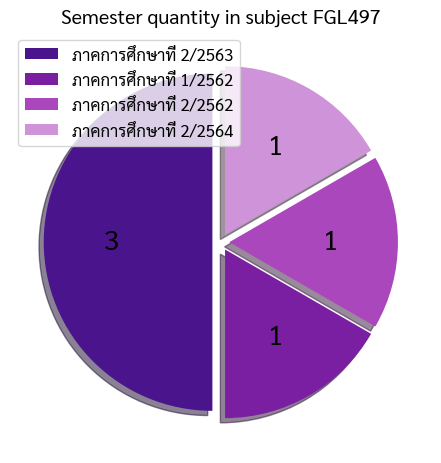

In [ ]:
plt.pie(FGL497['ภาคการศึกษาที่:'].value_counts(),
            #  labels=['ภาคการศึกษาที่ '+i for i in list(FGL497['ภาคการศึกษาที่:'].value_counts().index) if list(FGL497['ภาคการศึกษาที่:'].value_counts().index) == list(FGL497['ภาคการศึกษาที่:'].value_counts().index)],
             autopct=lambda p: '{:.0f}'.format(p * sum(FGL497['ภาคการศึกษาที่:'].value_counts()) / 100),
             startangle=90,shadow = True,explode=[0.05,0.05,0.05,0.05],colors=['#4a148c', '#7b1fa2', '#ab47bc','#ce93d8'],
             textprops={'fontsize': 20})

plt.title('Semester quantity in subject FGL497')
plt.legend(loc='upper left',labels=['ภาคการศึกษาที่ '+i for i in list(FGL497['ภาคการศึกษาที่:'].value_counts().index) if list(FGL497['ภาคการศึกษาที่:'].value_counts().index) == list(FGL497['ภาคการศึกษาที่:'].value_counts().index)])
plt.savefig('output3.png', transparent=True)
plt.tight_layout()
plt.show()

# plt.savefig('output.png', transparent=True)

จากภาพรวมทั้งหมด


*   จากกราฟที่ 1 : พบว่า sections 231863 มีจำนวนเยอะที่สุด แต่ไม่รู้สาเหตุว่าทำไมถึงเปิด sections อื่นแยกออกมาด้วย
*   จากกราฟที่ 2 : พบว่า วิชา FGL497 ทั้งหมดเป็นวิชาที่มีระดับการศึกษา เป็นปริญญาตรี โครงการพิเศษ ทั้งหมด
*   จากกราฟที่ 3 : พบว่า มีภาคการศึกษาดังนี้ 1/2562 2/2562 2/2563 2/2564 ซึ่งเปิดสอนในปี 2564 กับ 2563 ไม่ครบเทอม


# **ตอบคำถามที่ 1 ไม่ร้อยเปอร์เซ็น**
**ที่วิชา FGL497 เปิดสอนจำนวนมากอาจจะเป็นเพราะจำนวน sections ที่แตกต่างกันออกไป section 231863 มีเยอะสุด ซึ่งที่ไม่ทราบสาเหตุที่เปิดเพิ่มอีก 2 sections ดังนั้นคำตอบอาจจะยังไม่ชัดเจนมากที่สุด ต้องการหา insight เพิ่มเติมเพื่อนำมาประกอบในการตอบคำถามข้อนี้**

**หา insight เพิ่มเติม**

โดยสรุป จะทำการตัด sections ที่แตกต่างจาก 231863 เพราะไม่สามารถทราบสาเหตุที่แยกเซคมันคนละคณะกัน
หรือเพราะห้องเรียนที่นั่งไม่พอ หรือเหตุผลอื่นๆ เพื่อทำการหา ข้อมูลเชิงลึกต่อไป

* ภาพรวมตาราง FGL497_231863

In [ ]:
FGL497_231863 = FGL497[FGL497['Sec./Gr.:'].str.contains('231863')]
FGL497_231863

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web,จำนวนนักศึกษาที่ประเมิน_%,ปีการศึกษาที่
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6 (13.95%),https://sgulyano.github.io/eval/02226005.html,13.95,2562
3,FGL497,231863,2/2562,ปริญญาตรี โครงการพิเศษ,50,5 (10.00%),https://sgulyano.github.io/eval/24363682.html,10.00,2562
11,FGL497,231863,2/2563,ปริญญาตรี โครงการพิเศษ,44,6 (13.64%),https://sgulyano.github.io/eval/44868136.html,13.64,2563
21,FGL497,231863,2/2564,ปริญญาตรี โครงการพิเศษ,66,41 (62.12%),https://sgulyano.github.io/eval/79550445.html,62.12,2564


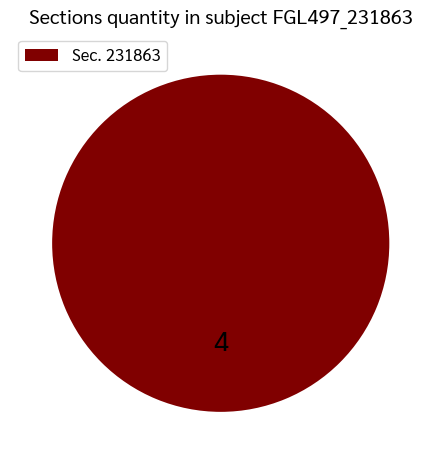

In [ ]:

# สร้างข้อมูลตัวอย่าง
section_counts = FGL497_231863['Sec./Gr.:'].value_counts()
section_labels = ['Sec. ' + i for i in list(section_counts.index)]

# แสดง Pie Chart
plt.pie(section_counts,autopct=lambda p: '{:.0f}'.format(p * sum(section_counts) / 100),
        startangle=90, colors=['#800000', '#cc0000', '#ff1a1a'], textprops={'fontsize': 20},
        explode=[0])

plt.title('Sections quantity in subject FGL497_231863')
plt.legend(loc='upper left',labels=section_labels)
plt.savefig('output_pie.png', transparent=True)
plt.tight_layout()
plt.show()



*   ภาพรวม FGL497_231863


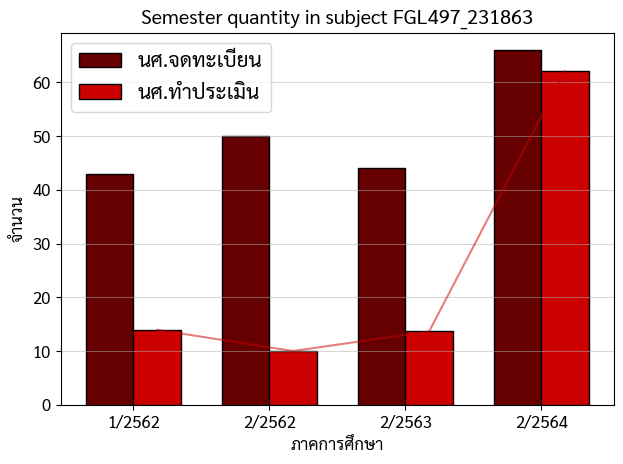

In [ ]:

plt.bar(np.arange(len(FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True).index)),
        FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True)['จำนวนนักศึกษาที่จดทะเบียน:'],width=0.35,
        label='นศ.จดทะเบียน',
        color='#660000',
        edgecolor='black')
plt.bar(np.arange(len(FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True).index))+0.35,
        FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True)['จำนวนนักศึกษาที่ประเมิน_%'],width=0.35,
        label='นศ.ทำประเมิน',
        color='#cc0000',
        edgecolor='black')

plt.plot(np.arange(len(FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True).index))+0.35,
        FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True)['จำนวนนักศึกษาที่ประเมิน_%'],
        color='#cc0000',
        alpha=0.5)

plt.xticks(np.arange(len(FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True).index)) + 0.35 / 2,
        FGL497_231863.groupby('ภาคการศึกษาที่:').sum(numeric_only=True).index)

plt.title('Semester quantity in subject FGL497_231863')
plt.xlabel('ภาคการศึกษา')
plt.ylabel('จำนวน')
plt.legend(prop={'size': 15})
plt.grid(axis='y', alpha=0.5)
plt.savefig('output.png', transparent=True)
plt.tight_layout()
plt.show()

พอตัด sections หาข้อมูลเชิงลึก ในแต่ละปี 2562 2563 นั้น จำนวนคนลงทะเบียนเยอะแต่คนทำประเมินน้อยอย่างมาก
คำตอบ จึงยังไม่แน่ชัดว่าทำไม วิชา FGL497 ทำไมถึงเปิดสอนเยอะ
จากการคาดการณ์แล้ว ที่เปิดเยอะอาจจะเป็นเพราะว่าในเรื่องของ sections ที่แตกต่างกันโดยไม่รู้สาเหตุที่เปิด sections แยกออกมา จึงต้องหาข้อมูลเชิงลึกเพิ่มเติม โดยจะดู section 231863 ว่าภาคไหนสอนดีที่สุดเพราะที่ตั้งคำถามนี้ วิชา FGL497 อาจจะมีรูปแบบการสอนที่ดีมากก็อาจจะเป็นไปได้

# **Data Preparation Table_content**


**TABLE_CONTENT**



1.   ดูภาพรวม DataFrame table_content



In [ ]:
FGL497_table = []
FGL497_year = []
for i in range(len(FGL497_231863['Link Web'])):
  FGL497_table.append(table_content(FGL497_231863['Link Web'].iloc[i]))
  FGL497_year.append(FGL497_231863['ภาคการศึกษาที่:'].iloc[i])
  # print(FGL497_year[i])
  # print(FGL497_table[i])
  # print("*"*70)

print(FGL497_year[1])
FGL497_table[1]

2/2562


,5,ร้อยละ,4,ร้อยละ,3,ร้อยละ,2,ร้อยละ,1,ร้อยละ,0,ร้อยละ,X-Bar,SD
"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ",3.0,60.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.55
ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,3.0,60.0,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.89
ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,1.0,20.0,3.0,60.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.71
ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์,2.0,40.0,3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.55
ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์,2.0,40.0,3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.55
ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น,1.0,20.0,2.0,40.0,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,3.6,1.14
ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม,1.0,20.0,3.0,60.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,3.8,1.1
ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม,1.0,20.0,3.0,60.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.71
รวม 1,14.0,35.0,20.0,50.0,4.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,4.15,0.8
รวมทั้งหมด,14.0,35.0,20.0,50.0,4.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,4.15,0.8


2. เช็คว่า Datasets มี missing values มั้ยและมีชนิดข้อมูลเป็นอย่างไร



*   ตรวจ missing values


In [ ]:
print(FGL497_year[1])
FGL497_table[1].isnull().sum().to_frame()

2/2562


,0
5,0
ร้อยละ,0
4,0
ร้อยละ,0
3,0
ร้อยละ,0
2,0
ร้อยละ,0
1,0
ร้อยละ,0


* ชนิดข้อมูล

In [ ]:
print(FGL497_year[1])
FGL497_table[1].info()

2/2562
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries,  ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ to รวมทั้งหมด
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   5       10 non-null     object
 1   ร้อยละ  10 non-null     object
 2   4       10 non-null     object
 3   ร้อยละ  10 non-null     object
 4   3       10 non-null     object
 5   ร้อยละ  10 non-null     object
 6   2       10 non-null     object
 7   ร้อยละ  10 non-null     object
 8   1       10 non-null     object
 9   ร้อยละ  10 non-null     object
 10  0       10 non-null     object
 11  ร้อยละ  10 non-null     object
 12  X-Bar   10 non-null     object
 13  SD      10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


พบว่า ทุก columns เป็น string หมดเลยดังนั้นจะแปลง ให้เป็น float64 ทุก columns

In [ ]:
print("อันเก่า")
print(FGL497_year[1])
FGL497_table[1].info()
print(" ")
print("*"*70)
print(" ")
print("อันใหม่")

for i in range(len(FGL497_table)):
  FGL497_table[i] = FGL497_table[i].astype('float64')
print(FGL497_year[1])
FGL497_table[1].info()

อันเก่า
2/2562
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries,  ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ to รวมทั้งหมด
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   5       10 non-null     object
 1   ร้อยละ  10 non-null     object
 2   4       10 non-null     object
 3   ร้อยละ  10 non-null     object
 4   3       10 non-null     object
 5   ร้อยละ  10 non-null     object
 6   2       10 non-null     object
 7   ร้อยละ  10 non-null     object
 8   1       10 non-null     object
 9   ร้อยละ  10 non-null     object
 10  0       10 non-null     object
 11  ร้อยละ  10 non-null     object
 12  X-Bar   10 non-null     object
 13  SD      10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB
 
**********************************************************************
 
อันใหม่
2/2562
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries,  ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมี

# **เริ่มตั้งคำถาม EDA ส่วนที่ 2 (table_content)**

# **คำถามที่ 2 ภาคการศึกษาในรายวิชา FGL497 Sec.231863 ไหนสอนดีสุด**

จากที่สำรวจวิชา FGL497 แล้วมีการตั้งคำถามว่าทำไมถึงเปิดสอนเยอะซึ่งคำตอบยังไม่ชัดเจนว่าเป็น sections แตกต่างกัน จึงต้องหา ข้อมูลเชิงลึกเพิ่มเติมว่าเขามีรูปแบบการสอนเป็นอย่างไรใน sections ที่เหมือนกันแต่คนละภาคการศึกษา

พบว่า แต่ละภาคการศึกมีคำถามที่วัดผลประเมินแตกต่างกันบางภาคการศึกษา



*   คำถามก่อนโควิด



In [ ]:
print(FGL497_year[0])
FGL497_table[0]

1/2562


,5,ร้อยละ,4,ร้อยละ,3,ร้อยละ,2,ร้อยละ,1,ร้อยละ,0,ร้อยละ,X-Bar,SD
สอนอย่างเป็นระบบ,4.0,66.67,1.0,16.67,0.0,0.00,1.0,16.67,0.0,0.00,0.0,0.0,4.33,1.21
สอนให้คิด วิเคราะห์ วิจารณ์,4.0,66.67,0.0,0.00,1.0,16.67,1.0,16.67,0.0,0.00,0.0,0.0,4.17,1.33
กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม,2.0,33.33,1.0,16.67,1.0,16.67,1.0,16.67,1.0,16.67,0.0,0.0,3.33,1.63
เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบการณ์ ทั้งภายในและภายนอกห้องเรียน,3.0,50.00,2.0,33.33,0.0,0.00,0.0,0.00,1.0,16.67,0.0,0.0,4.00,1.55
มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท้อนความสามารถของผู้เรียนนอกเหนือจากการตอบข้อสอบ,3.0,50.00,2.0,33.33,1.0,16.67,0.0,0.00,0.0,0.00,0.0,0.0,4.33,0.82
ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง,3.0,50.00,2.0,33.33,0.0,0.00,1.0,16.67,0.0,0.00,0.0,0.0,4.17,1.17
ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี,3.0,50.00,2.0,33.33,0.0,0.00,1.0,16.67,0.0,0.00,0.0,0.0,4.17,1.17
แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้,3.0,50.00,1.0,16.67,1.0,16.67,1.0,16.67,0.0,0.00,0.0,0.0,4.00,1.26
รวม 1,25.0,52.08,11.0,22.92,4.0,8.33,6.0,12.50,2.0,4.17,0.0,0.0,4.06,1.23
ผู้สอนแจ้งวัตถุประสงค์และเนื้อหารายวิชาตามเค้าโครงการสอนรายวิชาอย่างชัดเจน,4.0,66.67,1.0,16.67,1.0,16.67,0.0,0.00,0.0,0.00,0.0,0.0,4.50,0.84


* คำถามช่วงโควิด

In [ ]:
print(FGL497_year[1])
FGL497_table[1]

2/2562


,5,ร้อยละ,4,ร้อยละ,3,ร้อยละ,2,ร้อยละ,1,ร้อยละ,0,ร้อยละ,X-Bar,SD
"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ",3.0,60.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.60,0.55
ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,3.0,60.0,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.40,0.89
ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,1.0,20.0,3.0,60.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.71
ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์,2.0,40.0,3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.40,0.55
ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์,2.0,40.0,3.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.40,0.55
ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น,1.0,20.0,2.0,40.0,1.0,20.0,1.0,20.0,0.0,0.0,0.0,0.0,3.60,1.14
ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม,1.0,20.0,3.0,60.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,3.80,1.10
ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม,1.0,20.0,3.0,60.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.71
รวม 1,14.0,35.0,20.0,50.0,4.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,4.15,0.80
รวมทั้งหมด,14.0,35.0,20.0,50.0,4.0,10.0,2.0,5.0,0.0,0.0,0.0,0.0,4.15,0.80


ดังนั้น การที่จะบอกว่า ภาคการศึกษาไหนสอนดีที่สุดอาจจะวัดได้ยากเพราะคำถามประเมินนั้นแตกต่างกันในบางภาคการศึกษา จึงแก้วิธีการโดย จะใช้ ค่า z-score มาช่วยในการวัดผลว่าวิชาไหนสอนดีที่สุด

**Z-SCORE**

ทั้ง z-score เป็นวิธีการที่ทำให้คะแนนดิบเป็นมาตรฐานในการแจกแจง ซึ่งช่วยให้สามารถเปรียบเทียบคะแนนจากการแจกแจงแบบต่างๆ ได้โดยตรง

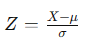

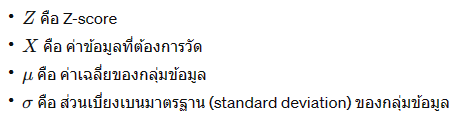


ยกตัวอย่าง

นาย A สอบวิชาอังกฤษข้อสอบในโรงเรียนได้ 50 คะแนน มี x-bar = 30 , std = 4 และ  
นาย B สอบวิชาอังกฤษข้อสอบ TOFEL ได้ 30 คะแนน มี x-bar = 50 , std = 3  
ถามว่านาย A กับ B ใครเก่งอังกฤษมากกว่ากัน   
Z คณิต = 5  
Z อังกฤษ = 3.33   
ตอบ นาย A เก่งคณิตมากกว่า เพราะค่า Z-score เป็น + แสดงว่าสูงกว่าค่าเฉลี่ยมากๆ

**หาค่า Z-score ทุกภาคการศึกษาที่อยู่ใน section 231863**

*   หาค่า xi,xbar,std ทุกภาคการศึกษา



In [ ]:
xi = []
xbar = []
std = []

for i in range(len(FGL497_table)):
  xi.append(round((FGL497_table[i].loc['รวมทั้งหมด',['5','4','3','2','1','0']].sum())*FGL497_table[i].loc['รวมทั้งหมด','X-Bar']))
  xbar.append(FGL497_table[i].loc['รวมทั้งหมด','X-Bar'])
  std.append(FGL497_table[i].loc['รวมทั้งหมด','SD'])
accuracy = pd.DataFrame({'xi':xi,'xbar':xbar,'std':std},index=FGL497_year)
keep_z = []
for i in range(4):
  keep_z.append(round((accuracy.iloc[i]['xi']-accuracy.iloc[i]['xbar'])/accuracy.iloc[i]['std'],2))
accuracy['z-score'] = keep_z
accuracy.sort_values('z-score',inplace=True)
accuracy

,xi,xbar,std,z-score
2/2562,166,4.15,0.80,202.31
2/2563,221,4.60,0.54,400.74
1/2562,503,4.19,1.11,449.38
2/2564,1389,4.34,0.81,1709.46




*   กราฟค่า z แต่ละภาค



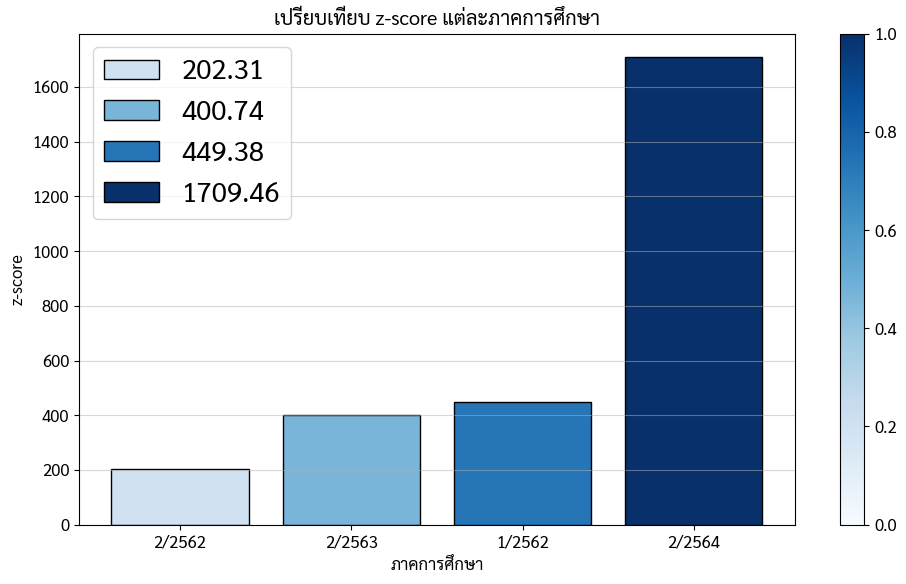

In [ ]:
# สร้างกราฟแท่งแนวนอน
cmap = plt.get_cmap('Blues')
fig, axe = plt.subplots(1, 1, figsize=(10, 6))  # สร้าง subplot 1x1

# สร้างกราฟแท่งแนวนอน
axe.bar(accuracy['z-score'].index,
         accuracy['z-score'],
         edgecolor='black',
         color=cmap(np.linspace(0.2, 1, len(accuracy['z-score'].index))),label=accuracy['z-score'])

# เพิ่ม colorbar
plt.colorbar(ScalarMappable(cmap='Blues'), ax=axe)

# ตกแต่งกราฟ
axe.set_title('เปรียบเทียบ z-score แต่ละภาคการศึกษา')
axe.set_ylabel('z-score')
axe.set_xlabel('ภาคการศึกษา')
axe.grid(axis='y', alpha=0.5)
axe.legend(prop={'size': 20})
fig.savefig('combined_plot.png', transparent=True, bbox_inches='tight')
fig.tight_layout()
plt.show()


# **ตอบคำถามที่ 2  ไม่ร้อยเปอร์เซ็น**

ยังไม่สามารถตอบได้ เพราะ
แสดงให้เห็น ค่า Z-Score ไม่เหมาะกับวัดผลกับข้อมูลชุดนี้เพราะว่า ค่าที่ได้มีจำนวนสูงมาก ซึ่งปกติแล้ว ค่า Z-Score จะอยู่ในช่วง -3 ถึง 3 แต่ค่าที่ได้กลับสูงมากอาจเป็นเพราะข้อมูลชุดนี้มีการกระจายตัวที่ไม่แจกแจงปกติ

อาจจะต้องใช้วิธีอื่น โดยการเช็คว่า ภาคการศึกษาส่วนใหญ่ให้คะแนนอย่างไร

# **คำถามที่ 2.1 ภาคการศึกษาในรายวิชา FGL497 Sec.231863 แต่ละภาคส่วนใหญ่ผลประเมินเป็นอย่างไร**

ซึ่งในการตอบประเมินจะมีเกณฑ์การให้คะแนน  ดังนี้    
ระดับการประเมิน : 5 = ดีมาก 4 = ดี 3 = ปานกลาง 2 = พอใช้ 1 = ปรับปรุง 0 = N/A (ไม่สามารถประเมินได้)      
 ซึ่งคำถามในการประเมินมีจำนวนมาก ดังนั้นจึงจะดูค่าดังนี้
 1. ดูจากค่าสัมประสิทธิ์ความแปรผันเพื่อเช็คว่าแต่ละภาคการศึกษาที่มีคำถามวัดแตกต่างกัน มีการกระจายตัวในการให้คะแนนประเมินมากเพียงใด ที่ใช้ค่า CV เพราะว่าชุดข้อมูลระหว่างภาคการศึกษามีหน่วยวัดคำถามที่แตกต่างกัน ก็เลยจะใช้ค่า CV แปลงให้คาวัดความแปรปรวนให้เป็นมาตราฐาน
 2. ดูจากค่าเฉลี่ยและส่วนเบี่ยงเบี่ยนมาตราฐาน มาดูช่วงว่าคนตอบประเมินจะตอบช่วงไหน
 3. ดูจากกราฟ histogram ช่วงข้อมูลที่คนตอบ ตอบช่วงไหน


คำอธิบายข้อแตกต่าง ค่าสถิติ
* std = ค่าที่บอกว่าข้อมูลมีระยะห่างจากค่าเฉลี่ยเป็นกี่หน่วย มันกระจายตัวห่างจากค่าเฉลี่ยอย่างไร  
* var = ค่าที่บอกว่าชุดข้อมูลมีการกระจายตัวมากเพียงใด เช่นชุดข้อมูล 100 ตัวเลข 90% เป็นเลขที่อยู่ในช่วง 5 ถึง 6 แล้วอีก 10% เป็นเลขที่อยู่ในช่วง 9 - 11 แสดงให้เห็นว่าในชุดข้อมูลมีการกระจายตัวสูง
* cv = จะคล้ายๆกับค่า var แต่ค่า cv การวัดการกระจายข้อมูลแบบมาตราฐานใช้สำหรับเปรียบเทียบชุดข้อมูล 2 ชุดขึ้นไป ซึ่งชุดข้อมูลแต่ละชุดจะมี ค่า mean std แตกต่างกันซึ่งถ้าเราเอาค่า var ไปเปรียบเทียบตรงๆก็อาจจะตอบไม่ได้ 100% ดังนั้นจึงต้องใช้ cv เข้ามาเปรียบเทียบว่าข้อมูลชุดไหน มีการกระจายตัวเป็นอย่างไร

สูตร สัมประสิทธิ์ความแปรผัน CV   

  
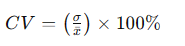

สูตร ความแปรปรวน โดยถ้ามี std อยู่แล้วจับยกกำลัง 2     

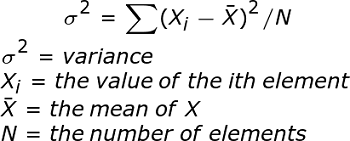

หาค่า CV , VAR

In [ ]:
accuracy['variance'] = accuracy['std']**2
accuracy['CV'] = round((accuracy['std']/accuracy['xbar']) * 100,2)
accuracy

,xi,xbar,std,z-score,variance,CV
2/2562,166,4.15,0.80,202.31,0.6400,19.28
2/2563,221,4.60,0.54,400.74,0.2916,11.74
1/2562,503,4.19,1.11,449.38,1.2321,26.49
2/2564,1389,4.34,0.81,1709.46,0.6561,18.66




1. ดูจากค่าสัมประสิทธิ์ความแปรผันเพื่อเช็คว่าแต่ละภาคการศึกษาที่มีคำถามวัดแตกต่างกัน มีการกระจายตัวในการให้คะแนนประเมินมากเพียงใด ที่ใช้ค่า CV เพราะว่าชุดข้อมูลระหว่างภาคการศึกษามีหน่วยวัดคำถามที่แตกต่างกัน ก็เลยจะใช้ค่า CV แปลงให้คาวัดความแปรปรวนให้เป็นมาตราฐาน

แสดงค่า CV ในแต่ภาคการศึกษาว่ามีความแปรปรวนเป็นอย่างไร มาเปรียบเทียบกันว่าผลประเมินภาคการศึกษาไหน มีความหลากหลายมากกว่ากัน



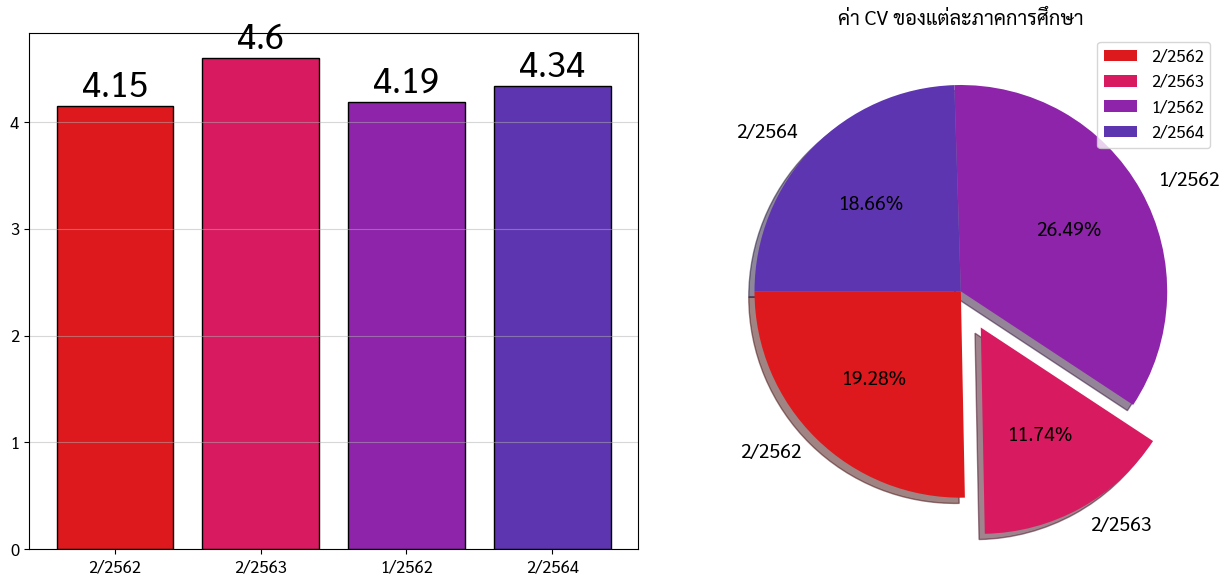

In [ ]:
f,axe = plt.subplots(1,2,figsize=(13,6))
axe[0].bar(accuracy['xbar'].index,
        accuracy['xbar'],
        label='ค่าเฉลี่ย',
        color=['#dd191d','#d81b60','#8e24aa','#5e35b1'],
        edgecolor='black')
axe[0].grid(axis='y',alpha=0.5)
for i, v in enumerate(accuracy['xbar']):
    axe[0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=25)

axe[1].pie(accuracy['CV'],
           labels=accuracy['CV'].index,
           startangle=180,
           shadow=True,explode=[0,0.2,0,0],
           autopct=lambda p: '{:.2f}%'.format(p * sum(accuracy['CV']) / 100),
           textprops={'fontsize': 14},colors=['#dd191d','#d81b60','#8e24aa','#5e35b1'])
axe[1].set_title('ค่า CV ของแต่ละภาคการศึกษา')
axe[1].legend()
plt.savefig('output.png', transparent=True)
plt.tight_layout()
plt.show()

จากกราฟแสดงให้เห็นว่า อ่านจากด้านซ้ายก่อนว่าในแต่ละภาคการศึกษานั้น ส่วนมากจะตอบผลประเมินเลข 4 กันอยู่แล้ว แล้วกราฟทางด้านขวาแสดงให้เห็นว่าแต่ละภาคการศึกษามีการกระจายตัวกันมากหรือไม่
ซึ่ง ผลประเมินส่วนมากเป็น เลข 4 แล้วกราฟทางขวามีการกระจายตัวของข้อมูลที่น้อยก็แสดงว่า ทุกภาคการศึกษาส่วนมากคะแนนจะอยู่ที่ เลข 4 ไม่ก็ 5 เป็นส่วนใหญ่
และ สังเกตปภาคการศึกษา 2/2563 นั้นมีค่าเฉลี่ยที่เกือบเข้าใกล้ 5 แล้วมีค่า CV ที่น้อยมากๆด้วยแสดงให้เห็นว่า ภาคการศึกษานี้สอนดีมากๆ

 2. ดูจากค่าเฉลี่ยและส่วนเบี่ยงเบี่ยนมาตราฐาน มาดูช่วงว่าคนตอบประเมินจะตอบช่วงไหน


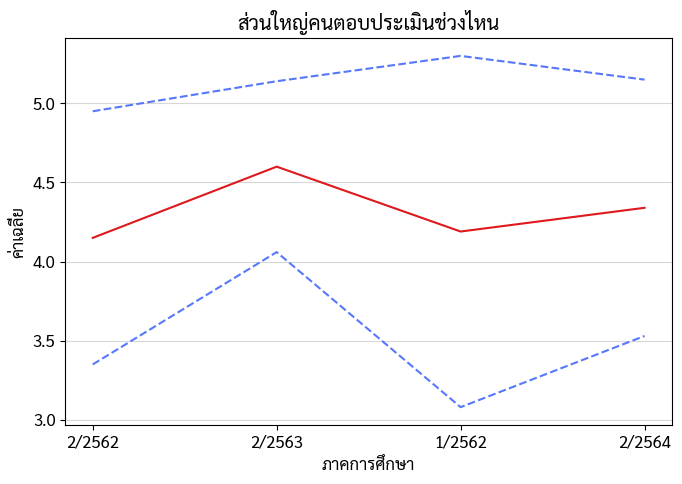

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(accuracy['xbar'].index,
        accuracy['xbar'],
        label='ค่าเฉลี่ย',
        color='#dd191d')
plt.plot(accuracy['xbar'].index,
        accuracy['xbar']+accuracy['std'],
        label='ค่าเฉลี่ย+SD',
        color='#5677fc',linestyle='--')
plt.plot(accuracy['xbar'].index,
        accuracy['xbar']-accuracy['std'],
        label='ค่าเฉลี่ย-SD',
        color='#5678fc',linestyle='--')
plt.title('ส่วนใหญ่คนตอบประเมินช่วงไหน')
plt.xlabel('ภาคการศึกษา')
plt.ylabel('ค่าเฉลี่ย')
plt.grid(axis='y', alpha=0.5)
plt.savefig('output4444.png', transparent=True)
plt.tight_layout()
plt.show()

กราฟนี้แสดงให้เห็นถึงว่า ส่วนใหญ่ในแต่ละปีตอบผลประเมินช่วงไหน โดย ยึดค่าเฉลี่ย แล้ว + - ค่าเฉลี่ย ก็จะเห็นช่วงในการตอบประเมิน

และที่เห็นได้ชัดเลยว่า

*   อาจจะเป็นไปได้ว่า ปี 2/2563 ช่วงมันอยู่ 4+ ขึ้นไปแสดงว่าอาจจะมีคำตอบแค่ 4 กับ 5
*   อาจจะเป็นไปได้ว่า ปี 1/2562 อาจเป็นภาคการศึกษาที่สอนแย่ที่สุดในลำดับ FGL497_231863



 3. ดูจากกราฟ histogram ช่วงข้อมูลที่คนตอบ ตอบช่วงไหน
อยากเห็นชัดๆว่า ในแต่ละภาคการศึกษามีคนตอบผลประเมินเลขอะไรบ้าง


นำข้อมูลผลการตอบประเมินแต่ละปีออกมา เพื่อ plot กราฟ

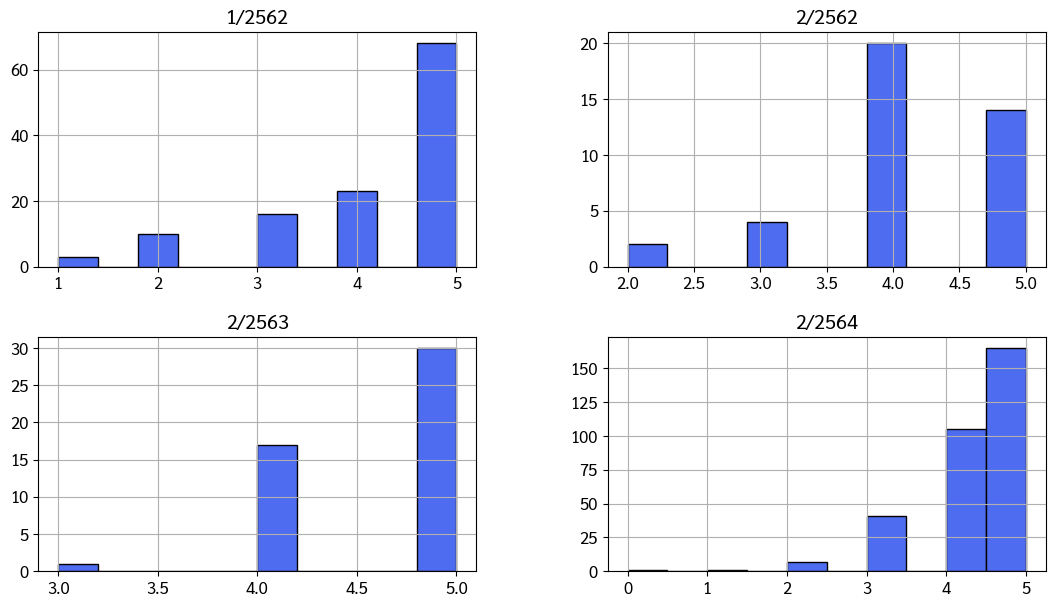

In [ ]:
point = [5,4,3,2,1,0]
dataset_FGL = []
for i in range(len(FGL497_table)):
  dataset_FGL.append(np.repeat(point,list(FGL497_table[i].loc['รวมทั้งหมด',['5', '4', '3', '2', '1', '0']])))
ds = pd.DataFrame(dataset_FGL,FGL497_year).transpose()
# display(ds)
ds.hist(figsize=(13,7),color='#4e6cef', edgecolor='black')
plt.savefig('wdwdwdwdwdwd.png', transparent=True)


กราฟ 4 อันนี้แสดงให้เห็นชัดๆเลยว่า ในแต่ละภาคการศึกษา มีคนให้คะแนนเลขอะไรบ้างซึ่ง        
*  กราฟก่อนหน้านี้ที่เป็นค่าเฉลี่ยและส่วนเบี่ยงเบนที่เราอนุมานว่า 2/2563 คำตอบอาจจะอยู่แค่ 4+ ก็เกือบจะจริงมีตอบ 3 บ้างเล็กน้อย


# **ตอบคำถามที่ 2.1 ร้อยเปอร์เซ็น**

ในการตอบคำถามนี้ ได้ใช้ค่าสถิติต่างๆเข้ามาช่วยดูผลประเมินแต่ละภาคการศึกษา
โดย
* step 1: นำค่าเฉลี่ยทุกภาคการศึกษามาดู เปรียบเทียบกับค่า CV ว่าคะแนนส่วนมากจะอยู่ใกล้กับค่าเฉลี่ยจริงหรือไม่ สิ่งที่พบคือ   
ภาคการศึกษาที่ 2/2563 มีค่า CV 11.74%  
ภาคการศึกษาที่ 2/2564 มีค่า CV 18.66%  
ภาคการศึกษาที่ 2/2562 มีค่า CV 19.28%   
ภาคการศึกษาที่ 1/2562 มีค่า CV 26.49%   
และค่าเฉลี่ยส่วนใหญ่อยู่ที่ 4.xx กันหมด ดังนั้น ภาคการศึกษาที่ 2/2563 ผลประเมินอาจจะตอบ เกณฑ์ 4 , 5 เป็นส่วนใหญ่เพราะค่า CV บ่งบอกถึงการกระจายของข้อมูล
* step 2: นำค่าเฉลี่ย มา + - ด้วย std เพื่อดูช่วงว่าห่างจากค่าเฉลี่ยเป็นอย่างไร
พบว่า ภาคการศึกษาที่ 2/2563 มีช่วง 4+ อนุมานได้ว่า ภาคการศึกษามีความเป็นไปได้สูงว่า จะมีเกณฑ์ประเมินเลข 4 , 5 ไม่มีเลขอื่น
* step 3: นำทุกภาคการศึกษามาดูกราฟ Histogram ว่าผลประเมินเกณฑ์แต่ละเกณฑ์มีจำนวนเท่าไหร่บ้าง พบว่า การอนุมานจาก step 2 เกือบเป็นจริง มีผลประเมินเลข 3 หลุดมาไม่กี่ตัว

# **ตอบคำถามที่ 2 ร้อยเปอร์เซ็น**



จาก z-score ที่เราไม่สามารถหาคำตอบได้ เราจึงได้ไปหา insight แต่ละภาคการศึกษาว่าผลประเมินภาคการศึกษาแต่ละภาคเป็นอย่างไร
*   พบว่าภาคการศึกษา 2/2563 อนุมานว่าน่าจะสอนดีที่สุดเพราะว่า จากค่าสถิติที่วัดได้ มีค่าเฉลี่ยสูงที่สุด มีค่า CV ที่น้อยกว่าภาคอื่นๆ และกราฟ histogram แสดงให้เห็นว่า ส่วนใหญ่ผลประเมินตอบเกณฑ์ 4 กับ 5 เป็นส่วนมาก
ดังนั้น จึงสรุปได้ว่าภาคการศึกษา 2/2563 สอนดีที่สุด

# **คำถามที่ 3 ภาคการศึกษารายวิชา FGL497 Sec.231863 ที่สอนดีที่สุดมีจุดเด่นอย่างไร**
ที่ถามคำถามนี้ เพื่อจะหา insight เขาสอนอย่างไรทำไมถึงคนประเมินให้คะแนนสูง สามารถนำไปปรับใช้กับวิชาอื่นๆที่มีผลประเมินต่ำได้ว่า ควรพัฒนาตามแบบ วิชานี้



*   ดูภาพรวมของภาคการศึกษา 2/2563 ก่อนว่าเป็นอย่างไร



In [ ]:
FGL497_231863_BEST = FGL497_231863[FGL497_231863['ภาคการศึกษาที่:'].str.contains('2/2563')]
FGL497_231863_BEST

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,Link Web,จำนวนนักศึกษาที่ประเมิน_%,ปีการศึกษาที่
11,FGL497,231863,2/2563,ปริญญาตรี โครงการพิเศษ,44,6 (13.64%),https://sgulyano.github.io/eval/44868136.html,13.64,2563


คนตอบประเมิน มี 6 คน

In [ ]:
best = FGL497_table[2]
FGL497_year[2]
FGL497_table[2]

,5,ร้อยละ,4,ร้อยละ,3,ร้อยละ,2,ร้อยละ,1,ร้อยละ,0,ร้อยละ,X-Bar,SD
"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ",5.0,83.33,1.0,16.67,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.83,0.41
ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,4.0,66.67,2.0,33.33,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.67,0.52
ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,4.0,66.67,2.0,33.33,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.67,0.52
ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์,3.0,50.00,3.0,50.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.50,0.55
ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์,3.0,50.00,3.0,50.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.50,0.55
ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น,4.0,66.67,2.0,33.33,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.67,0.52
ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม,3.0,50.00,2.0,33.33,1.0,16.67,0.0,0.0,0.0,0.0,0.0,0.0,4.33,0.82
ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม,4.0,66.67,2.0,33.33,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.67,0.52
รวม 1,30.0,62.50,17.0,35.42,1.0,2.08,0.0,0.0,0.0,0.0,0.0,0.0,4.60,0.54
รวมทั้งหมด,30.0,62.50,17.0,35.42,1.0,2.08,0.0,0.0,0.0,0.0,0.0,0.0,4.60,0.54


ข้อคำถามในการประเมิน มี 8 คำถาม

ภาพรวมดังกล่าว มีคนประเมิน 6 คน ข้อคำถาม 8 คำถาม          
 ถ้าทั้ง 6 คนให้ผลประเมินเกณฑ์ 5 ทั้ง 8 คำถามเลย แสดงว่าผลประเมินเกณฑ์ 5 จะมีทั้งหมด 48(6*8)      
 แล้วผลประเมินทั้ง 6 คนมีจำนวนเกณฑ์ 5 ทั้งหมด 30    
 นำมาเปรียบเทียบกัน 48 , 30    
 สรุปได้ว่า ปริมาณเกณฑ์ 5 มีจำนวนที่สูงมากแสดงว่าทุกคำถามผู้สอนทำได้ดีเกือบหมดเลย

*   หาจุดเด่นแต่ละข้อคำถาม

ชื่อคำถามมันยาว จึงเปลี่ยนชื่อให้มัน

In [ ]:
best = best.head(8)
best['Question_1'] = best.index
best['Question_2'] = [f'Q{i}' for i in range(1,9) if i == i]
new_best = best[['Question_1','Question_2','X-Bar']]
new_best

<ipython-input-355-331c3c9a1144>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-355-331c3c9a1144>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Question_1,Question_2,X-Bar
"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ","ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, แ...",Q1,4.83
ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำก...,Q2,4.67
ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้...,Q3,4.67
ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์,ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปร...,Q4,4.50
ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์,ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้...,Q5,4.50
ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น,ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างป...,Q6,4.67
ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม,ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด ...,Q7,4.33
ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม,ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม แล...,Q8,4.67


เปลี่ยนชื่อเป็น

In [ ]:
for i in range(len(new_best.index)):
  print(f'Q{i+1} to {new_best.index[i]}')

Q1 to  ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ
Q2 to ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด
Q3 to ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด
Q4 to ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์ 
Q5 to ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์
Q6 to ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น
Q7 to ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม
Q8 to ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติ

สร้างกราฟดูความแตกต่าง

<ipython-input-369-45253f9500df>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



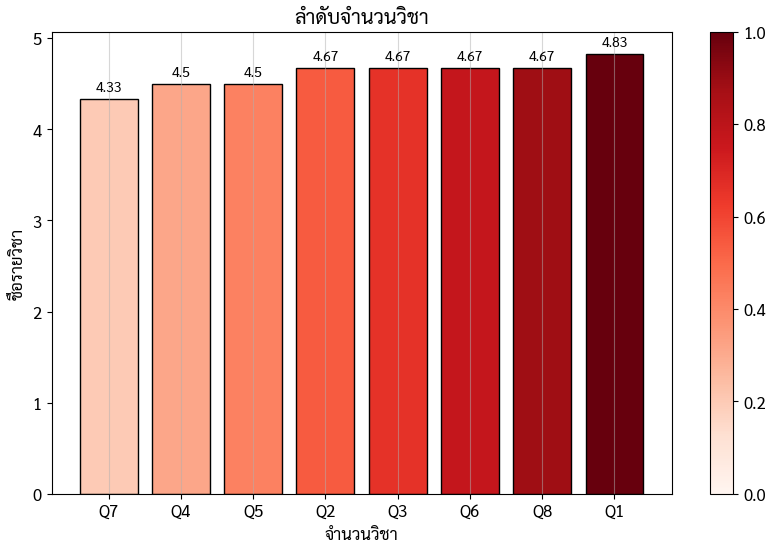

In [ ]:
plt.figure(figsize=(10, 6))

# Create a colormap
cmap = plt.get_cmap('Reds')

bars = plt.bar(new_best.sort_values(by='X-Bar', ascending=True)['Question_2'],
               new_best.sort_values(by='X-Bar', ascending=True)['X-Bar'],
               edgecolor='black',
               color=cmap(np.linspace(0.2, 1, len(new_best.sort_values(by='X-Bar', ascending=True)['Question_2']))))

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add colorbar
sm = ScalarMappable(cmap='Reds')
sm.set_array([])
cbar = plt.colorbar(sm)

# Set labels and title
plt.title('ลำดับจำนวนวิชา')
plt.xlabel('จำนวนวิชา')
plt.ylabel('ชื่อรายวิชา')
plt.grid(axis='x', alpha=0.5)
plt.savefig('asaas.png', transparent=True)
plt.show()



สรุปว่า คำถามที่ได้คะแนน 3 อันดับแรกที่ดีที่สุด คือ Q1, Q8 ,Q6

คำถาม Q1 , Q8 , Q6 มีอะไรบ้าง

In [ ]:
display(new_best.set_index(new_best['Question_2']).loc[['Q1','Q8','Q6']])
print(" ")
[i for i in list(new_best.set_index(new_best['Question_2']).loc[['Q1','Q8','Q6']]['Question_1'])]

,Question_1,Question_2,X-Bar
Question_2,,,
Q1,"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, แ...",Q1,4.83
Q8,ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม แล...,Q8,4.67
Q6,ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างป...,Q6,4.67


[' ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ',
 'ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม',
 'ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น']

# **ตอบคำถามที่ 3 ร้อยเปอร์เซ็น**
จุดเด่นที่ได้ วัดจากค่าเฉลี่ยของข้อคำถาม ซึ่ง 3 อันดับแรกคือ Q1 Q8 Q6 ตามลำดับ    
Q1'ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ'    
Q8'ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม'    
Q6'ผู้สอนอธิบายชัดเจน ตรงประเด็น ตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น'    
แสดงให้เห็นว่า
* Q1 : ผู้สอนอาจจะมีเอกสารอ่านประกอบการเรียน มีวัตถุประสงค์การสอนที่ชัดเจน
* Q8 : ผู้สอนมีสไตล์การสอนที่ให้นักศึกษาเป็นคนดี มีการปลูกฝังจิตสำนึก
* Q6 : ผู้สอนมีคำอธิบายที่เข้าใจ มีภาพประกอบ

ดังนั้นเราสามารถนำ จุดเด่นเหล่านี้ไปส่งต่อให้รายวิชาที่ มีผลประเมินต่ำพัฒนาในส่วนนี้ต่อได้ เพราะรายวิชาดังกล่าวนี้แสดงให้เห็นจุดเด่นของผู้สอนสามารถส่งต่อให้วิชาอื่นปรับใช้ตามเพื่อผู้เรียนได้ประสิทธิ์ภาพดีดั่งรายวิชานี้


# **ตอบคำถามที่ 1 ร้อยเปอร์เซ็น**
จากคำตอบก่อนหน้านี้ ที่เปิดสอนเยอะอาจจะเป็นเพราะ sections ที่แยกออกจากกันซึ่งเป็นคำตอบที่ยังไม่ชัดเจน แต่พอได้หา insight ของข้อมูลลงเรื่อยๆ พบว่าที่เปิดสอนเยอะ เพราะผู้สอนในรายวิชา FGL497 มีผลประเมินที่ดีมากเป็นส่วนใหญ่ ดังนั้น เขาอาจจะสอนดีมากก็ได้ เลยทำให้ผู้เรียนสนใจทำให้เกิดวิชา FGL497 เยอะ

# **สรุปทั้งหมด**

ทั้งหมดแล้ว Datasets ชุดนี้เป็นผลประเมินรายวิชา   
* ลำดับแรกเราได้สงสัยว่าทำไม รายวิชา FGL497 ถึงเปิดเยอะ ซึ่งคำตอบตอนแรกที่ได้ คิดว่าเป็นที่ sections เยอะ แต่เอาจริงๆแล้วเป็นที่ผู้สอนรายวิชานี้สอนดี
* ลำดับสองระหว่างที่หาคำตอบจากคำถามที่ 1 ระหว่างที่หา insight เราได้ตั้งคำถามที่ 2 ขึ้นว่า ภาคการศึกษาในวิชา FGL497 ไหนสอนดีที่สุดและตัด sections ที่แตกต่างออกเอาแต่ sections ที่เยอะที่สุดคือ 231863 แต่มันไม่สามารถหาได้เพราะว่า ข้อมูลวัดผลประเมินมีคำถามแตกต่างกัน พยายามใช้ค่า z-score แล้วก็ไม่ได้เลย ตั้งคำถามที่ 2.1 ว่า แล้วภาคการศึกษาแต่ละส่วนเป็นมีผลประเมินเป็นอย่างไร ในรายวิชา FGL497 Sec.231863
ผลสรุปคือ ภาคการศึกษาทุกภาคมีผลประเมินที่ดีมากๆ แทบทุกภาคเลยและสามารถตอบคำถามที่ 2 ได้แล้ว
ว่าภาคไหนดีที่สุด ปรากฏว่าเป็นภาคการศึกษา 2/2563 วัดจากค่าสถิติต่างๆ mean , std , cv
* ลำดับสาม เมื่อเรารู้แล้วว่า ภาคการศึกษา 2/2563 สอนดีที่สุดในรายวิชา FGL497 Sec.231863 เราก็จะมาหาจุดเด่นแต่ละข้อคำถามว่าเขาเด่นอะไร และเมื่อหาได้แล้ว
สามารถนำมาส่งต่อบอกให้รายวิชาอื่นรู้ว่าควรเน้นในส่วนไหนในการสอน เพื่อพัฒนาการสอนให้ดีที่สุด